# Introduction

This is an introduction on
- how to compute a sample covariance matrix given some data
- how to visualize the sample covariance matrix

# Variants

This notebook provides 3 different variants:

1. where two variables x,y are independent
2. where x and y are dependant: the larger x, the larger y
3. where x and y are dependant: the larger x, the smaller y

In [72]:
variant = 4

# Generate and visualize some data

shape of M is (100000, 2)


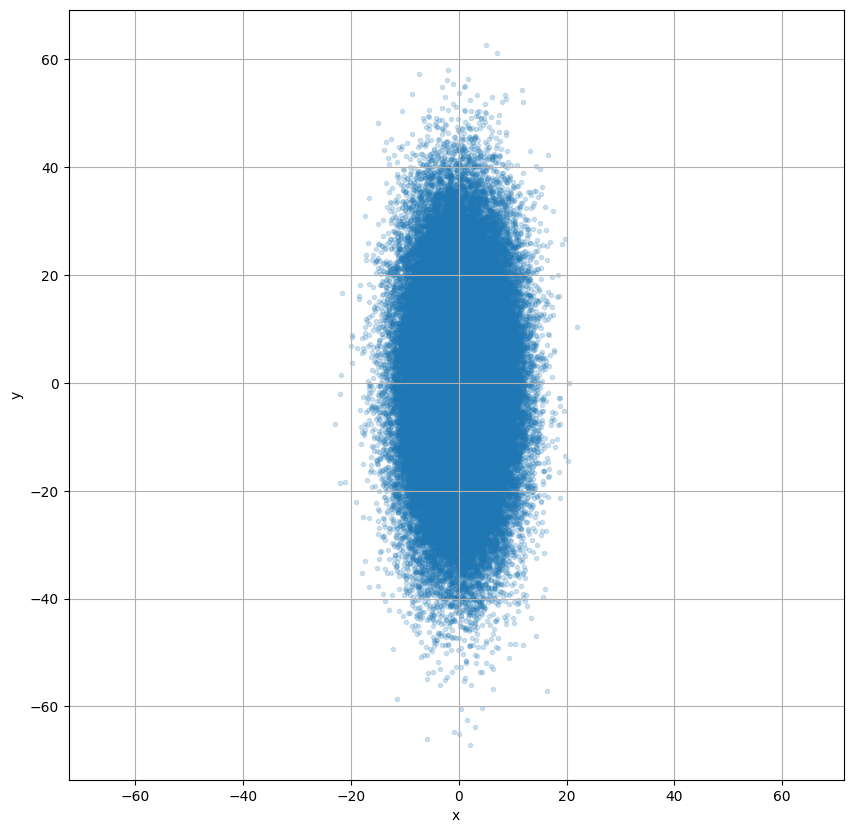

In [74]:
import numpy
N = 100000
M = numpy.zeros((N,2))

for i in range(N):
    x = numpy.random.normal(loc=0, scale=5)
    
    if variant==1:  # i.i.d.
        y = numpy.random.normal(loc=0, scale=5)
    elif variant==2:
        y = x + numpy.random.normal(loc=0, scale=5)
    elif variant==3:
        y = -x + numpy.random.normal(loc=0, scale=1)
    elif variant==4:
        y = numpy.random.normal(loc=0, scale=15)
        
    M[i,0] = x
    M[i,1] = y
    
print( f"shape of M is {M.shape}" )

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(M[:,0], M[:,1], marker=".", alpha=0.2)
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
#plt.xlim(-10,10)
#plt.ylim(-10,10)
plt.grid()
plt.show()

In [21]:
M[:5]

array([[ -0.28138227,  -2.89825779],
       [  0.4825521 ,  -3.01173383],
       [ -5.31741257, -12.95355348],
       [  0.62148854,   4.19821042],
       [  5.59588185,   1.17210755]])

In [22]:
M.shape

(100000, 2)

# Compute sample covariance matrix

For the definition of the sample covariance matrix see e.g.
- https://en.wikipedia.org/wiki/Sample_mean_and_covariance#Definition_of_sample_covariance (English)
- https://de.wikipedia.org/wiki/Stichprobenkovarianz (German)
    

$\sigma_{x,y} := Cov(x,y) := \frac{1}{n-1} \sum \limits_{i=1}^n (x_i - \overline x) (y_i - \overline y)$

## Variant A

Here we do not use NumPy functionality, but compute the covariance matrix by our own:

In [53]:
Cov_M = numpy.zeros( (2,2) )

def cov(x,y):
    
    n = len(x)
        
    # compute means
    mean_x = 0
    mean_y = 0
    for i in range(n):
        mean_x += x[i]
        mean_y += y[i]
    mean_x /= n
    mean_y /= n
        
    # compute covariance
    sigma_xy = 0
    for i in range(n):
        sigma_xy += (x[i] - mean_x) * (y[i] - mean_y)
    sigma_xy *= 1/(n-1)
    #sigma_xy *= 1/n
    
    return sigma_xy

x = M[:,0]
y = M[:,1]

Cov_M[0,0] = cov(x,x)
Cov_M[0,1] = cov(x,y)
Cov_M[1,0] = cov(y,x)
Cov_M[1,1] = cov(y,y)

print("Cov_M:")
print(Cov_M)

Cov_M:
[[24.94606489  0.07307323]
 [ 0.07307323 24.95685085]]


## Variant B

We can directly compute the covariance matrix `Cov_M` of a given matrix `M` using NumPy's function `cov()`.

Note the importance of the flag `rowvar=False`, which tells NumPy that each column is a single variable and each row an observation:

see https://numpy.org/doc/stable/reference/generated/numpy.cov.html



In [27]:
Cov_M = numpy.cov(M, rowvar=False, bias=False)
print("Cov_M:")
print(Cov_M)

Cov_M:
[[ 25.16930491 -25.15495205]
 [-25.15495205  26.14086076]]


We can see that both resulting covariance matrices - computing the covariance matrix by our own and computing the covariance matrix using NumPy - are the same.

# Relationship between variance and covariance

$Var(X) = Cov(X,X)$

In [28]:
Cov_M = numpy.cov(M, rowvar=False, bias=True)
Cov_M

array([[ 25.16905321, -25.1547005 ],
       [-25.1547005 ,  26.14059935]])

In [29]:
numpy.var(M[:,0])

np.float64(25.169053213099822)

In [30]:
numpy.var(M[:,1])

np.float64(26.1405993495532)

# Visualize the covariance matrix

## As a heatmap

In [31]:
Cov_M

array([[ 25.16905321, -25.1547005 ],
       [-25.1547005 ,  26.14059935]])

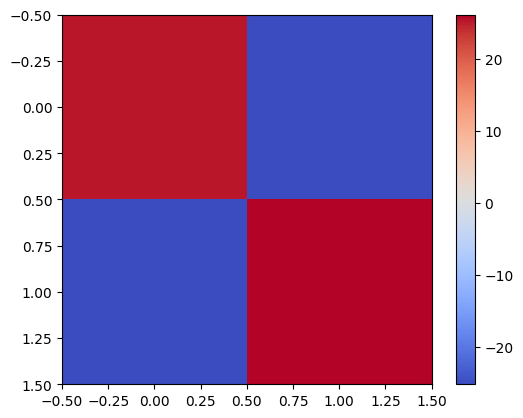

In [32]:
plt.imshow( Cov_M, cmap="coolwarm" )
plt.colorbar()
plt.show()

## As an ellipse

See https://stackoverflow.com/questions/20126061/creating-a-confidence-ellipses-in-a-sccatterplot-using-matplotlib

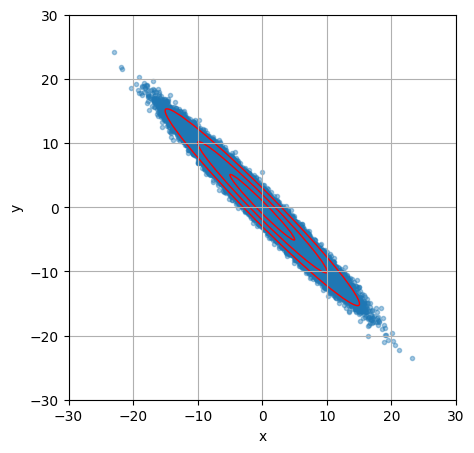

In [33]:
def plot_ellipse_for_data_matrix(M):

    from matplotlib.patches import Ellipse

    def eigsorted(cov):
        vals, vecs = numpy.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    # see https://en.wikipedia.org/wiki/Normal_distribution#Standard_deviation_and_coverage
    # 2 sigma corresponds to 95% of the data points
    nstd = 2

    # compute covariance matrix
    x = M[:,0]
    y = M[:,1]
    cov = numpy.cov(x,y)

    # compute eigenvectors and eigenvalues
    # sort eigenvectors in descing order of eigenvalues
    vals, vecs = eigsorted(cov)

    # compute angle of ellipse
    theta = numpy.degrees(numpy.arctan2(*vecs[:,0][::-1]))

    # compute width and height of ellipse
    # see https://cookierobotics.com/007/
    # note: the lengths of the eigenvectors such that we
    #       have a 1 sigma ellipse are
    #       sqrt(eigenvalue1) and sqrt(eigenvalue2)
    #
    #       so the length of the ellipse rectangle sides
    #       are 2*sqrt(eigenvalue1) and 2*sqrt(eigenvalue2)
    #
    #       since we do not want to plot the 1 sigma= 90% confidence area,
    #       but the 2 sigma = 95% confidence area, we multiply with nstd
    plt.figure(figsize=(5,5))
    ax = plt.subplot(111)
    plt.scatter(x, y, marker=".", alpha=0.4)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim(-30,30)
    plt.ylim(-30,30)
    plt.grid()
    for sigma in range(1,4):
        w, h = 2 * sigma * numpy.sqrt(vals)
        ell = Ellipse(xy=(numpy.mean(x), numpy.mean(y)),
                      width=w, height=h,
                      angle=theta, color='red')
        ell.set_facecolor('none')
        ax.add_artist(ell)
    plt.show()
    
plot_ellipse_for_data_matrix(M)

# Check whether a matrix is a covariance matrix

See https://localcoder.org/find-out-if-matrix-is-positive-definite-with-numpy

In [40]:
def is_pos_semi_definite(x):
    # M is positive semi-definite, if x^TMx >= 0 for all x!=0-vector
    return bool(numpy.all(numpy.linalg.eigvals(x) >= 0))

In [41]:
cov_M = numpy.cov(M, rowvar=False, bias=False)
numpy.linalg.eigvals(cov_M)

array([ 0.49544069, 50.81472498])

In [42]:
M

array([[ -4.37465988,   5.77295025],
       [-10.64969407,  10.28612809],
       [  3.07335018,  -2.93922846],
       ...,
       [  0.58834827,   0.2116762 ],
       [ -2.65031689,   1.87992952],
       [ -3.70580016,   1.66892128]], shape=(100000, 2))

In [43]:
Cov_M = numpy.cov(M, rowvar=False, bias=False)
is_pos_semi_definite(Cov_M)

True

In [44]:
Cov_M = [[1, 0],
         [0, -5]]
is_pos_semi_definite(Cov_M)

False

In [45]:
Cov_M = [[1, 0],
         [0, 5]]
is_pos_semi_definite(Cov_M)

True

In [46]:
Cov_M = [[1, 2],
         [2, 4]]
is_pos_semi_definite(Cov_M)

True

In [47]:
Cov_M = [[1, 2],
         [3, 4]]
is_pos_semi_definite(Cov_M)

False

In [48]:
numpy.linalg.eigvals(Cov_M)

array([-0.37228132,  5.37228132])

In [49]:
Cov_M = [[1, 2],
         [3, 5]]
is_pos_semi_definite(Cov_M)

False

In [50]:
numpy.linalg.eigvals(Cov_M)

array([-0.16227766,  6.16227766])

# Datenpunktewolken bei unterschiedlichen Kovarianzmatrizen

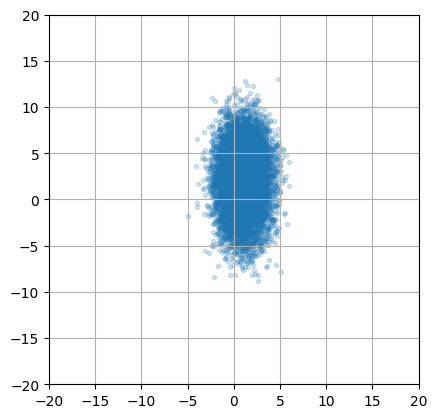

In [71]:
import numpy as np

mean = (1, 2)
cov = [[2, 0],
       [0, 10]]
N = 10000
x = np.random.multivariate_normal(mean, cov, size=N)

plt.scatter(x[:,0], x[:,1], marker=".", alpha=0.2)
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.grid()
#plt.axis('equal')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [59]:
x.shape

(10000, 2)

In [76]:
np.eye(10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])